In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.impute import KNNImputer

from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsRegressor

import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [118]:
immoSV_df = pd.read_csv(r'C:\Users\Admin\Documents\marianneSimplon\simplon\immo_SiliconValley_marianneD\data\traindata_ori.csv',delimiter=',', decimal='.')
immoSV_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.00,1853.00,473.00,1397.00,417.00,1.48,72000.00,INLAND
1,10600,-117.80,33.68,8.00,2032.00,349.00,862.00,340.00,6.91,274100.00,<1H OCEAN
2,2494,-120.19,36.60,25.00,875.00,214.00,931.00,214.00,1.55,58300.00,INLAND
3,4284,-118.32,34.10,31.00,622.00,229.00,597.00,227.00,1.53,200000.00,<1H OCEAN
4,16541,-121.23,37.79,21.00,1922.00,373.00,1130.00,372.00,4.08,117900.00,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.00,1465.00,278.00,745.00,250.00,3.06,93800.00,INLAND
16508,18898,-122.25,38.11,49.00,2365.00,504.00,1131.00,458.00,2.61,103100.00,NEAR BAY
16509,11798,-121.22,38.92,19.00,2531.00,461.00,1206.00,429.00,4.50,192600.00,INLAND
16510,6637,-118.14,34.16,39.00,2776.00,840.00,2546.00,773.00,2.58,153500.00,<1H OCEAN


In [119]:
# Supression de la colonne Unnamed: 0
immoSV_df = immoSV_df.drop("Unnamed: 0", axis=1)

In [120]:
immoSV_df.dropna(axis=0, inplace=True)

In [121]:
immoSV_df = immoSV_df.reset_index(inplace=False)
immoSV_df = immoSV_df.drop("index", axis=1)

In [122]:
immoSV_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.00,1853.00,473.00,1397.00,417.00,1.48,72000.00,INLAND
1,-117.80,33.68,8.00,2032.00,349.00,862.00,340.00,6.91,274100.00,<1H OCEAN
2,-120.19,36.60,25.00,875.00,214.00,931.00,214.00,1.55,58300.00,INLAND
3,-118.32,34.10,31.00,622.00,229.00,597.00,227.00,1.53,200000.00,<1H OCEAN
4,-121.23,37.79,21.00,1922.00,373.00,1130.00,372.00,4.08,117900.00,INLAND
...,...,...,...,...,...,...,...,...,...,...
16331,-121.90,39.59,20.00,1465.00,278.00,745.00,250.00,3.06,93800.00,INLAND
16332,-122.25,38.11,49.00,2365.00,504.00,1131.00,458.00,2.61,103100.00,NEAR BAY
16333,-121.22,38.92,19.00,2531.00,461.00,1206.00,429.00,4.50,192600.00,INLAND
16334,-118.14,34.16,39.00,2776.00,840.00,2546.00,773.00,2.58,153500.00,<1H OCEAN


In [123]:
df = immoSV_df.copy()

### Split du dataset en un dataset train et un dataset test

In [124]:
immoSV_train, immoSV_test = train_test_split(immoSV_df, test_size=0.3, random_state=101)

In [125]:
immoSV_train.shape

(11435, 10)

In [126]:
immoSV_test.shape

(4901, 10)

### Scaling par normalisation

In [127]:
# Liste des colonnes de données numériques à Scaler
immoSV_num_columns_list = list(immoSV_train.columns)
immoSV_num_columns_list.remove('ocean_proximity')
immoSV_num_columns_list.remove('median_house_value')

In [128]:
sc = MinMaxScaler()
ft_sc = sc.fit(immoSV_train[immoSV_num_columns_list])
immoSV_train[immoSV_num_columns_list] = ft_sc.transform(immoSV_train[immoSV_num_columns_list])

In [129]:
immoSV_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2766,0.30,0.64,0.78,0.04,0.05,0.02,0.05,0.10,63300.00,INLAND
9050,0.49,0.43,0.25,0.08,0.12,0.10,0.12,0.07,56900.00,INLAND
7950,0.65,0.16,0.69,0.03,0.03,0.02,0.04,0.25,205100.00,<1H OCEAN
12475,0.49,0.44,0.35,0.09,0.09,0.04,0.09,0.19,160100.00,INLAND
11541,0.21,0.56,0.90,0.05,0.06,0.02,0.05,0.12,172700.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
5695,0.62,0.15,0.75,0.05,0.09,0.05,0.08,0.04,96900.00,<1H OCEAN
8006,0.20,0.55,0.80,0.11,0.17,0.10,0.16,0.05,212800.00,NEAR BAY
1361,0.67,0.12,0.25,0.07,0.05,0.04,0.05,0.52,308900.00,<1H OCEAN
1547,0.23,0.57,0.63,0.04,0.05,0.02,0.05,0.18,163100.00,NEAR BAY


In [130]:
immoSV_test[immoSV_num_columns_list] = ft_sc.transform(immoSV_test[immoSV_num_columns_list])

In [131]:
immoSV_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12217,0.21,0.61,0.18,0.02,0.02,0.01,0.03,0.42,218100.00,NEAR BAY
11610,0.24,0.53,0.31,0.13,0.21,0.09,0.22,0.18,220800.00,<1H OCEAN
14486,0.29,0.64,0.78,0.03,0.05,0.02,0.05,0.07,58300.00,INLAND
354,0.48,0.43,0.35,0.04,0.05,0.03,0.05,0.21,131700.00,INLAND
14418,0.59,0.15,0.75,0.07,0.07,0.03,0.07,0.51,500001.00,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4879,0.68,0.16,0.16,0.11,0.09,0.06,0.10,0.35,195100.00,INLAND
1100,0.23,0.52,0.80,0.06,0.07,0.03,0.08,0.40,397400.00,NEAR BAY
10076,0.22,0.56,0.96,0.06,0.06,0.03,0.06,0.37,327600.00,NEAR BAY
3197,0.73,0.02,1.00,0.04,0.03,0.01,0.04,0.42,331400.00,NEAR OCEAN


In [132]:
immoSV_train_sc = immoSV_train.copy()
immoSV_test_sc = immoSV_test.copy()

In [133]:
immoSV_train_sc.shape

(11435, 10)

In [134]:
immoSV_test_sc.shape

(4901, 10)

### Encoding par OneHotEncoder

In [135]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit(immoSV_train_sc[['ocean_proximity']])
enc_df = pd.DataFrame(enc.transform(immoSV_train_sc[['ocean_proximity']]).toarray())

In [139]:
enc_df.shape

(11435, 5)

In [21]:
immoSV_train_sc.shape

(11435, 10)

In [22]:
enc_df.index.isna().any()

False

In [23]:
immoSV_train_sc.index.isna().any()

False

In [24]:
immoSV_train_sc = immoSV_train_sc.reset_index()
immoSV_train_sc = immoSV_train_sc.merge(enc_df,how='inner', on=immoSV_train_sc["index"])
immoSV_train_sc = immoSV_train_sc.drop(['key_0','index','ocean_proximity'], axis=1)
immoSV_train_sc.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_train_sc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR_OCEAN,NEAR_BAY,ISLAND,INLAND,H_OCEAN
0,0.295132,0.644681,0.784314,0.035560,0.048269,0.021220,0.053947,0.095123,63300.0,0.0,1.0,0.0,0.0,0.0
1,0.486815,0.431915,0.254902,0.076258,0.122769,0.098868,0.120559,0.074902,56900.0,0.0,1.0,0.0,0.0,0.0
2,0.651116,0.159574,0.686275,0.033932,0.033990,0.023547,0.039803,0.253321,205100.0,1.0,0.0,0.0,0.0,0.0
3,0.494929,0.440426,0.352941,0.085084,0.091107,0.044010,0.088816,0.192535,160100.0,0.0,1.0,0.0,0.0,0.0
4,0.210953,0.563830,0.901961,0.052678,0.061772,0.019930,0.053289,0.120219,172700.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11430,0.616633,0.147872,0.745098,0.052704,0.086761,0.053064,0.082566,0.044613,96900.0,1.0,0.0,0.0,0.0,0.0
11431,0.195740,0.550000,0.803922,0.107163,0.174298,0.099260,0.162993,0.050951,212800.0,0.0,0.0,0.0,1.0,0.0
11432,0.673428,0.115957,0.254902,0.074757,0.054943,0.036021,0.054770,0.524896,308900.0,1.0,0.0,0.0,0.0,0.0
11433,0.234280,0.574468,0.627451,0.041893,0.051529,0.022593,0.053618,0.182115,163100.0,0.0,0.0,0.0,1.0,0.0


In [25]:
enc_df = pd.DataFrame(enc.transform(immoSV_test_sc[['ocean_proximity']]).toarray())

In [26]:
enc_df.shape

(4901, 5)

In [27]:
immoSV_test_sc = immoSV_test_sc.reset_index()
immoSV_test_sc = immoSV_test_sc.merge(enc_df,how='inner', on=immoSV_test_sc["index"])
immoSV_test_sc = immoSV_test_sc.drop(['key_0','index','ocean_proximity'], axis=1)
immoSV_test_sc.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_test_sc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR_OCEAN,NEAR_BAY,ISLAND,INLAND,H_OCEAN
0,0.211968,0.610638,0.176471,0.024495,0.024523,0.013287,0.029276,0.419305,218100.0,0.0,0.0,0.0,1.0,0.0
1,0.240365,0.530851,0.313725,0.130412,0.213099,0.094691,0.219901,0.181563,220800.0,1.0,0.0,0.0,0.0,0.0
2,0.294118,0.637234,0.784314,0.032355,0.047493,0.023294,0.045724,0.066916,58300.0,0.0,1.0,0.0,0.0,0.0
3,0.482759,0.427660,0.352941,0.043928,0.046717,0.025313,0.045888,0.213707,131700.0,0.0,1.0,0.0,0.0,0.0
4,0.588235,0.153191,0.745098,0.066058,0.070464,0.025789,0.067105,0.511007,500001.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,0.682556,0.156383,0.156863,0.108333,0.090796,0.063688,0.096546,0.349188,195100.0,0.0,1.0,0.0,0.0,0.0
4897,0.225152,0.520213,0.803922,0.060640,0.071395,0.031900,0.076645,0.400767,397400.0,0.0,0.0,0.0,1.0,0.0
4898,0.215010,0.562766,0.960784,0.063820,0.061617,0.026966,0.061020,0.369629,327600.0,0.0,0.0,0.0,1.0,0.0
4899,0.734280,0.023404,1.000000,0.037595,0.034456,0.013735,0.036349,0.421056,331400.0,0.0,0.0,0.0,0.0,1.0


In [28]:
immoSV_train_enc = immoSV_train_sc.copy()
immoSV_test_enc = immoSV_test_sc.copy()

### Definition X et y

In [168]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR_OCEAN,NEAR_BAY,INLAND
0,0.30,0.64,0.78,0.04,0.05,0.02,0.05,0.10,0.00,1.00,0.00
1,0.49,0.43,0.25,0.08,0.12,0.10,0.12,0.07,0.00,1.00,0.00
2,0.65,0.16,0.69,0.03,0.03,0.02,0.04,0.25,1.00,0.00,0.00
3,0.49,0.44,0.35,0.09,0.09,0.04,0.09,0.19,0.00,1.00,0.00
4,0.21,0.56,0.90,0.05,0.06,0.02,0.05,0.12,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
11430,0.62,0.15,0.75,0.05,0.09,0.05,0.08,0.04,1.00,0.00,0.00
11431,0.20,0.55,0.80,0.11,0.17,0.10,0.16,0.05,0.00,0.00,1.00
11432,0.67,0.12,0.25,0.07,0.05,0.04,0.05,0.52,1.00,0.00,0.00
11433,0.23,0.57,0.63,0.04,0.05,0.02,0.05,0.18,0.00,0.00,1.00


In [29]:
df_train = immoSV_train_enc.drop(["H_OCEAN","ISLAND"], axis=1)
df_test = immoSV_test_enc.drop(["H_OCEAN","ISLAND"], axis=1)

In [30]:
X_train = df_train.drop(["median_house_value"], axis=1)
X_test = df_test.drop(["median_house_value"], axis=1)
y_train = df_train[["median_house_value"]]
y_test = df_test[["median_house_value"]]

In [32]:
# X_train.to_csv('./datasets/X_train.csv', index=False)
# X_test.to_csv('./datasets/X_test.csv', index=False)
# y_train.to_csv('./datasets/y_train.csv', index=False)
# y_test.to_csv('./datasets/y_test.csv', index=False)

### Modèle existant

In [31]:
X_train = pd.read_csv('./datasets/X_train.csv')
X_test = pd.read_csv('./datasets/X_test.csv')
y_train = pd.read_csv('./datasets/y_train.csv')
y_test = pd.read_csv('./datasets/y_test.csv')

In [5]:
ancien_model = pickle.load(open("./existant/model.pkl","rb"))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [6]:
ancien_model.score(X_test, y_test)

0.7897659103218598

In [7]:
ancien_y_pred = ancien_model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, ancien_y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, ancien_y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, ancien_y_pred)}")

MSE : 2809553302.7125974
RMSE : 53005.21957989229
MAE : 35553.12699449092


### Modelisation

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor(random_state=0)
# # 5-Fold Cross validate model
# cv_results = cross_validate(model, X, y, cv=5)
# # obtain the mean of scores
# cv_results['test_score'].mean()

In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4731201736.9112425
RMSE : 68783.7316297338
MAE : 44466.3950214242


In [43]:
model.score(X_test,y_test)

0.6299098292910379

In [35]:
model.score(X_train,y_train)

1.0

In [40]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:12<00:00,  4.59s/it]


In [42]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.81,0.82,48577.86,0.57
XGBRegressor,0.81,0.81,48715.96,1.93
HistGradientBoostingRegressor,0.81,0.81,48773.25,2.04
RandomForestRegressor,0.81,0.81,49853.06,10.53
BaggingRegressor,0.78,0.79,52391.57,1.14
ExtraTreesRegressor,0.78,0.78,53083.44,8.10
GradientBoostingRegressor,0.76,0.76,55013.98,4.25
KNeighborsRegressor,0.70,0.70,61882.08,0.53
LassoLarsIC,0.64,0.64,67476.39,0.04


In [45]:
import xgboost as xgb

In [46]:
# xgbr = xgb.XGBRegressor(verbosity=0) 
# print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [194]:
model = xgb.XGBRegressor(random_state=0)
# # 5-Fold Cross validate model
# cv_results = cross_validate(model, X, y, cv=5)
# # obtain the mean of scores
# cv_results['test_score'].mean()

In [195]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 2373255886.752258
RMSE : 48716.074213264124
MAE : 32220.099410117196


In [196]:
model.score(X_test,y_test)

0.814356113920942

In [197]:
model.score(X_train,y_train)

0.949694807332655

### Critique du modèle existant (underfitting, etc.)

In [123]:
y.describe()

,median_house_value
count,16336.000000
mean,206442.492287
std,115264.335238
min,14999.000000
25%,119375.000000
50%,179300.000000
75%,264325.000000
max,500001.000000


In [134]:
from matplotlib import pyplot

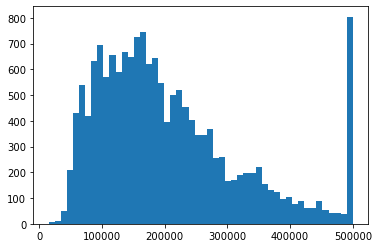

In [139]:
pyplot.hist(y, 50)
pyplot.show()

# Sans Pipeline

##### Learning curve avant

In [52]:
train_sizes, train_scores, test_scores = learning_curve(estimator = xgb.XGBRegressor(random_state=0),
                                          X = X_train,
                                          y = y_train,
                                          train_sizes = [5,10,20,30,40,50,100,200,300,400],
                                          cv = 5,
                                          scoring='neg_root_mean_squared_error',
                                          shuffle = True,
                                          random_state=0)

In [53]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

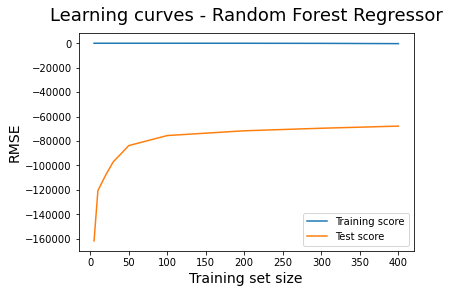

In [54]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - Random Forest Regressor', fontsize = 18, y = 1.03)
# plt.ylim([0,1])
plt.legend()
plt.show()

###### Grid Search sans pipeline

In [55]:
xgb.XGBRegressor(random_state=0).get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]

In [51]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [56]:
grid_search_2 = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=True)

In [58]:
%%time
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 24.8min finished


Wall time: 24min 47s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=0,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameter

In [59]:
print(grid_search_2.best_params_, grid_search_2.best_score_)

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 1.0} -48958.22734658343


In [198]:
xgbr_model = xgb.XGBRegressor(random_state=0, colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0)

In [199]:
xgbr_model.fit(X_train,y_train)
xgbr_model.predict(X_test)
xgbr_model.score(X_train,y_train)

0.9110396717846205

In [200]:
xgbr_model.score(X_test,y_test)

0.812108294255143

In [201]:
y_pred_2 = xgbr_model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred_2)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_2))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_2)}")

MSE : 2401991825.0418887
RMSE : 49010.11961872659
MAE : 32878.06337075661


In [63]:
train_sizes, train_scores, test_scores = learning_curve(estimator = xgbr_model,
                                          X = X_train,
                                          y = y_train,
                                          train_sizes = [5,10,20,30,40,50,100,200,300,400],
                                          cv = 5,
                                          scoring='neg_root_mean_squared_error',
                                          shuffle = True,
                                          random_state=0)

In [64]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

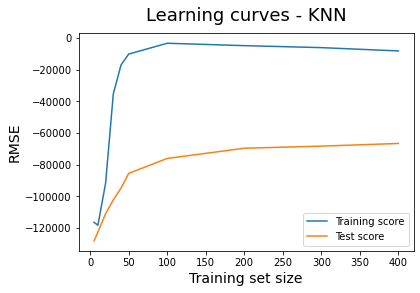

In [65]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - KNN', fontsize = 18, y = 1.03)
# plt.ylim([0,1])
plt.legend()
plt.show()

# 2e tentative

###### Grid Search sans pipeline

In [51]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# param_grid={'max_depth': [1, 2, 3, 4],
#                          'n_estimators': [100, 150, 200, 250, 300]

In [ ]:
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]

In [100]:
param_grid_2 = [
    {
        'n_estimators': [3, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300],
        'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#         'bootstrap': [False, True]
    }
]

In [101]:
grid_search_2 = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_2, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3)

In [102]:
%%time
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 891 candidates, totalling 4455 fits


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1h 48min 11s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [3, 10, 20, 30, 40, 50, 100, 150, 200,
                                           250, 300]}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [103]:
print(grid_search_2.best_params_, grid_search_2.best_score_)

{'max_depth': 10, 'max_features': 6, 'n_estimators': 300} -53558.878805593195


In [202]:
rfr_model = RandomForestRegressor(random_state=0, max_depth=10, max_features=6, n_estimators=300)

In [203]:
rfr_model.fit(X_train,y_train)
rfr_model.predict(X_test)
rfr_model.score(X_train,y_train)

0.8709136213019848

In [204]:
rfr_model.score(X_test,y_test)

0.7789850529003742

In [205]:
y_pred_2 = rfr_model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred_2)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_2))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_2)}")

MSE : 2825436567.5207434
RMSE : 53154.83578679125
MAE : 36195.453464844715


In [107]:
train_sizes, train_scores, test_scores = learning_curve(estimator = rfr_model,
                                          X = X_train,
                                          y = y_train,
                                          train_sizes = [5,10,20,30,40,50,100,200,300,400],
                                          cv = 5,
                                          scoring='neg_root_mean_squared_error',
                                          shuffle = True,
                                          random_state=0)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

In [108]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

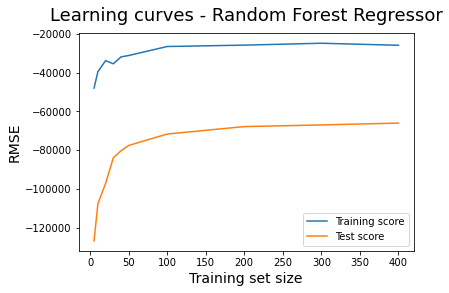

In [110]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - Random Forest Regressor', fontsize = 18, y = 1.03)
# plt.ylim([0,1])
plt.legend()
plt.show()

In [111]:
param_grid_2 = [
    {
        'n_estimators': [3, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300],
        'max_features': [6, 8],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'bootstrap': [False, True]
    }
]

In [112]:
grid_search_2 = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_2, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3)

In [113]:
%%time
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 616 candidates, totalling 3080 fits


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1h 58min 37s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'bootstrap': [False, True],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15],
                          'max_features': [6, 8],
                          'n_estimators': [3, 10, 20, 30, 40, 50, 100, 150, 200,
                                           250, 300]}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [114]:
print(grid_search_2.best_params_, grid_search_2.best_score_)

{'bootstrap': False, 'max_depth': 15, 'max_features': 6, 'n_estimators': 250} -49924.091049019866


In [115]:
rfr_model = RandomForestRegressor(bootstrap=False, max_depth=15, max_features=6, n_estimators=250)

In [116]:
rfr_model.fit(X_train,y_train)
rfr_model.predict(X_test)
rfr_model.score(X_train,y_train)

<ipython-input-116-d0eb7c90ee31>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train,y_train)


0.9846961642198475

In [117]:
rfr_model.fit(X_train, y_train)
y_pred_2 = rfr_model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred_2)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_2))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_2)}")

<ipython-input-117-036672d407c6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train, y_train)


MSE : 2485421648.24749
RMSE : 49854.003332204826
MAE : 32607.046594593383


In [118]:
train_sizes, train_scores, test_scores = learning_curve(estimator = rfr_model,
                                          X = X_train,
                                          y = y_train,
                                          train_sizes = [5,10,20,30,40,50,100,200,300,400],
                                          cv = 5,
                                          scoring='neg_root_mean_squared_error',
                                          shuffle = True,
                                          random_state=0)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

In [119]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

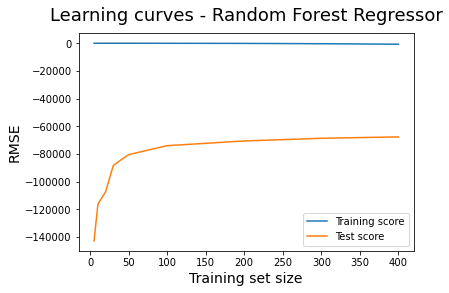

In [120]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - Random Forest Regressor', fontsize = 18, y = 1.03)
# plt.ylim([0,1])
plt.legend()
plt.show()

In [123]:
with open("./my_pickles/rfr.pkl", "wb") as file:
    pickle.dump(model, file)

In [121]:
with open("./my_pickles/minmaxscaler.pkl", "wb") as file:
    pickle.dump(sc, file)

In [122]:
with open("./my_pickles/onehotencoder.pkl", "wb") as file:
    pickle.dump(enc, file)

In [67]:
ENCODER_VERSION = 'onehotencoder.pkl'
ENCODER_PATH = os.path.join(os.getcwd(), 'my_pickles',
                            ENCODER_VERSION)  # path vers le modèle
with open(ENCODER_PATH, 'rb') as handle:
    ENCODER = pickle.load(handle)

In [82]:
a = pd.DataFrame(df.iloc[1]).T['ocean_proximity']

In [96]:
(pd.DataFrame(df.iloc[1]).T).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           1 non-null      object
 1   latitude            1 non-null      object
 2   housing_median_age  1 non-null      object
 3   total_rooms         1 non-null      object
 4   total_bedrooms      1 non-null      object
 5   population          1 non-null      object
 6   households          1 non-null      object
 7   median_income       1 non-null      object
 8   median_house_value  1 non-null      object
 9   ocean_proximity     1 non-null      object
dtypes: object(10)
memory usage: 88.0+ bytes


In [98]:
b = pd.DataFrame(df.iloc[1]).T

In [104]:
b[b.columns[0:9]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-117.80,33.68,8.00,2032.00,349.00,862.00,340.00,6.91,274100.00


In [105]:
cat = b[b.columns[-1]]
non_cat = b[b.columns[0:9]]

In [93]:
cat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-117.80,33.68,8.00,2032.00,349.00,862.00,340.00,6.91,274100.00,<1H OCEAN


In [ ]:
ocean_proximity
ocean_proximity

In [114]:
cat2=pd.DataFrame(cat)

In [ ]:
<1H OCEAN
INLAND
NEAR BAY
NEAR OCEAN
ISLAND

In [169]:
cat2.iloc[0]="INLAND"

In [170]:
cat2

,ocean_proximity
1,INLAND


In [171]:
encode_data = pd.DataFrame(ENCODER.transform(cat2))

In [143]:
encode_data #<1H OCEAN

,0
0,"(0, 0)\t1.0"


In [148]:
encode_data #INLAND

,0
0,"(0, 1)\t1.0"


In [152]:
encode_data #NEAR BAY

,0
0,"(0, 3)\t1.0"


In [156]:
encode_data #NEAR OCEAN

,0
0,"(0, 4)\t1.0"


In [160]:
encode_data #ISLAND

,0
0,"(0, 2)\t1.0"


In [165]:
encode_data2 = ENCODER.transform(cat2)
encode_data2

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [172]:
pd.DataFrame.sparse.from_spmatrix(encode_data2)

,0,1,2,3,4
0,0.00,0.00,1.00,0.00,0.00


In [174]:
type(pd.DataFrame(pd.DataFrame.sparse.from_spmatrix(encode_data2)))

pandas.core.frame.DataFrame

In [183]:
mypd = pd.DataFrame({'longitude': [float("-119.84")], 'latitude': [float("36.77")], 'housing_median_age': [6], 'total_rooms': [1853], 'total_bedrooms': [
            473], 'population': [1397], 'households': [417], 'median_income': [float("1.4817")], 'ocean_proximity': ["INLAND"]})

In [186]:
mypd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.84,36.77,6,1853,473,1397,417,1.48,INLAND


In [189]:
mypd[mypd.columns[0]]

0   -119.84
Name: longitude, dtype: float64

In [ ]:
pd.DataFrame({'longitude': [float("-119.84")], 'latitude': [float("36.77")], 'housing_median_age': [6], 'total_rooms': [1853], 'total_bedrooms': [
            473], 'population': [1397], 'households': [417], 'median_income': [float("1.4817")], 'ocean_proximity': ["INLAND"]})[0]

In [190]:
pd.DataFrame(
            [[0.457404, 0.448936, 0.098039, 0.046981, 0.073103, 0.038936, 0.068257, 0.067709, 1.0, 0.0, 0.0]], columns=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "INLAND", "NEAR_BAY", "NEAR_OCEAN"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,NEAR_BAY,NEAR_OCEAN
0,0.46,0.45,0.10,0.05,0.07,0.04,0.07,0.07,1.00,0.00,0.00


In [181]:
pd.DataFrame([[0.457404, 0.448936, 0.098039, 0.046981, 0.073103, 0.038936, 0.068257, 0.067709, 1.0, 0.0, 0.0]])

,0
0,0.46
1,0.45
2,0.10
3,0.05
4,0.07
5,0.04
6,0.07
7,0.07
8,1.00
9,0.00


In [193]:
pd.DataFrame(df.median_house_value.describe())

,median_house_value
count,16336.00
mean,206442.49
std,115264.34
min,14999.00
25%,119375.00
50%,179300.00
75%,264325.00
max,500001.00
